# PubPy Demonstration Notebook

If you are an academic, your career will be judged by administrators who know little about your field (despite their best efforts) and who rely on publication indices. Therefore, it is important to know your publication and citation history better than anyone who may be evaluating your performance as an academic. I have built this repository and a package of python functions that generates plots and other information to put your publication and citation history into a clear perspective. It is useful for annual evaluations, promotion, and tenure, and involves simply in you manually updating your data from Google Scholar by creating a new tab on an Excel spreadsheet and adding new publications with updated citation information. 

This Jupyter notebook demonstrates the functions in PubPy and their outputs. It is included in the repository as a .py file and can be opened as a Jupyter notebook using Jupytext in most environments. I recommend you simply rename this notebook and point it towards your publication data instead of `H_Index_Rosenheim_Demo.xlsx` to generate a record of your publications and citations. You can use `H_Index_Rosenheim_Demo.xlsx` to generate your publication and citation history data by simply changing the file name, deleting the extraneous tabs of my citation information, and adding tabs of your own data from Google Scholar. Because the data on Google Scholar are cumulative, this exercise in and of itself provides a valuable snapshot of past research productivity.

## Calculating the Hirsch Index
The first demonstration simply calculates your Hirsch Index, commonly known as the H-index.

In [1]:
#Load Python Packages
import PubPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Pull in data from excel spreadsheet named in variable `filename`
filename = 'H_Index_Rosenheim_Demo.xlsx'    #Change this to the file containing your publication data.
pubs_dict, pubs_snapshot_list = PubPy.get_publication_data(filename)

#Your excel notebook data are now in a dictionary with keys being the date codes printed below (pubs_snapshot_list) and values being DataFrames of your data.
#Calculate the h-index from the last year in the snapshots:
h, sorted_pubs_df = PubPy.calculate_H_index(pubs_dict[pubs_snapshot_list[-1]])
print('H-index for ', pubs_snapshot_list[-1], ' = ', h)



[][*][][*][][*][][*][]][*][][*][][*][][*][][*][][*]
PubPy - Tracking your "progress" better than your administrators are.
Your available publication snapshot dates are:  ['20130301', '20140101', '20150101', '20150601', '20150913', '20160201', '20170119', '20180102', '20190123', '20200106', '20210128', '20220117', '20230101', '20240425', '20250102']
H-index for  20250102  =  33


## Generate Time Series of H-Index

Calculating an h-index is redundant with what Google Scholar already tells you, but you can now go back and see what your h-index was in previous years from previous snapshots. The next cell shows you a timeseries of your h-index, which is good to compare to h-index predictions like the [Acuna, Allesina, and Kording (2012) method](https://www.nature.com/articles/489201a#Sec1)$^1$. There is a variable for the axes handles returned by this function if you wish to add a predition for comparison. 

$^1$ There used to be a calculator linked to this article. As of December 2022, it was no longer functioning. Other studies of the h-index which are more recent are also more complex and seem to not produce a calculator for individual predictions. If you cannot find a prediction, this is also a good space to put your own forecast in to a .csv file formatted like `Rosenheim_AAK_forecast_2013.csv`. Over the years following your own prediction/wish, you can see how it is playing out. 


Including predictive data for comparison to snapshot data. Leave keyword argument out of function call if you do not want predictive data shown.


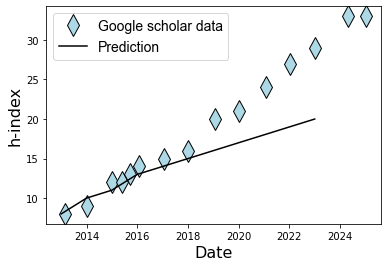

In [2]:
ts_df, ts_ax = PubPy.h_index_time_series(pubs_dict, prediction='Rosenheim_AAK_forecast_2013.csv')


## Visualize the H-Index

Many administrators and academics use the h-index, but few visualize how it is calculated. This a useful exercise to see how one's h-index is impacted by certain publications and how other publications do not contribute to it. One can also visualize which publications contribute to the h-index fastest versus those which take a while to "catch fire."

The next cell visualizes the h-index from one snapshot. The cell below that shows how you can visualize the growth of your h-index through time in a richer context than the time series above.

['Year list is specified, pared down requested keys of pubs_dict to: ', ['20250102']] 
 Specified list matches publications data years. 
 


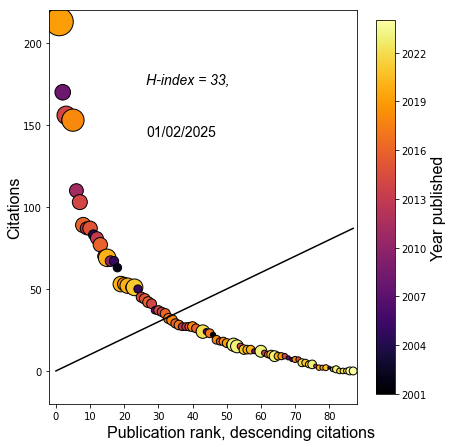

In [3]:
#Here, we choose one year to visualize - the most recent year. 

snapshot = [list(pubs_dict.keys())[-1]]  
                        #This will always give the last date code in the excel notebook (as a list!), referring to
                        #the sheet in my excel workbook. This could also simply be a list of an 8-digit string, 
                        # YYYYMMDD, that corresponds to one of the tabs in the workbook.

PubPy.Hirsch_panels_auto(pubs_dict, year_list=snapshot, color_map='inferno')

#To save this plot, change the file name and add a directory path to the line below. You can also change
#the type of file by changing the extension.

plt.savefig('Hirsch_Plot_Example_'+snapshot[0]+'.png')

## H-Index Comparison
After an initial snapshot of Google Scholar data, your h-index will grow. It is useful, then, to compare Hirsch plots. The following cell constructs a panel figure with several Hirsch plots, as above, except that they all share one color bar for ease of interpretation. This portrayal of your snapshots is far more nuanced than a simple time series of your h-index as displayed above. 


('Years from the pubs_dict are: ', ['20130301', '20140101', '20150101', '20150601', '20150913', '20160201', '20170119', '20180102', '20190123', '20200106', '20210128', '20220117', '20230101', '20240425', '20250102'])
Working with list of years in original dataset... 
  
 ['List of years shortened to 4: ', ['20150101', '20170119', '20210128', '20250102'], ' to fit graph. Please specify 4 specific years as "year_list" if you wish to plot different years than this selection.']
(dict_keys(['20150101', '20170119', '20210128', '20250102']),)
('Limits of publication years are in format: ', (2001, 2024))
('Publication year range: ', 23)
(0, '20150101')
(1, '20170119')
(2, '20210128')
(3, '20250102')


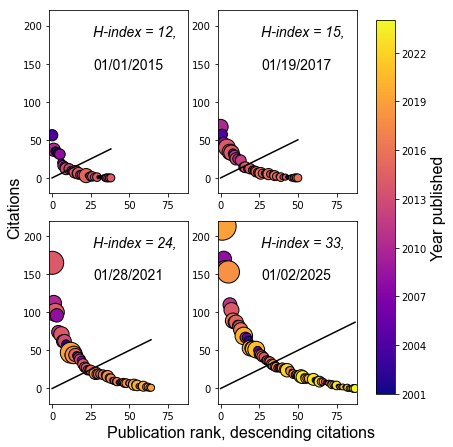

In [ ]:
#Now, we can use the same function to generate a multi panel figure of different years' data. In the simplest form, 
#the function will use the keys list of the pubs_dict and then pare it down to 4 for a 4-panel figure. Specific years 
#can be specified as in the cell above (using anywhere between 1 and 4 years), and the function checks to make sure that 
#those years are available. 
PubPy.DEBUG = False
PubPy.Hirsch_panels_auto(pubs_dict)

## Automatic Import of Publication Metric Data from Google Scholar

I was informed by Matthew Siegfried that it is possible to import publication data automatically through the scholarly package. I have managed to use this with some people, but it does not work for other. For instance, the example below imports data from my Google scholar profile, but some of the keys of the imported data are not populated with data or simply not present. It seems to work with younger researchers but not with older ones. *This is a work in progress...*


In [ ]:
from scholarly import scholarly
import pandas as pd

# Retrieve the author's data, fill-in, and print
# Get an iterator for the author results
search_query = scholarly.search_author('Brad Rosenheim')
author = scholarly.fill(next(search_query))

# Grab the pub title, year, and number of citations
num = 10
print(author['publications'][num]['bib']['pub_year'], author['publications'][num]['bib']['title'])        #Pub year seems to print...
titles = [pub['bib']['title'] for pub in author['publications']]
cites = [pub['num_citations'] for pub in author['publications']]
years = [pub['bib']['pub_year'] for pub in author['publications']]  #But pub year also seems to throw an error (titles and cites work!).


data = pd.DataFrame(data = {'year': years, 'title': titles, 'num_cites': cites})
data 

2012 Direct measurement of riverine particulate organic carbon age structure


KeyError: 'pub_year'